In [1]:
from hdrh.histogram import HdrHistogram
import seaborn as sns
import pandas
from matplotlib import pyplot as plt
import os.path
import matplotlib as mpl
from typing import *


MIN_LATENCY_USEC = 1
MAX_LATENCY_USEC = 1000*1000 # 1 sec
LATENCY_SIGNIFICANT_DIGITS = 5

log = lambda runid, buildstring: f'/home/wenyuz/MMTk-Dev/evaluation/results/log/{runid}/{buildstring}'

# Pause time curve

In [2]:
MIN_PAUSE_USEC = 1
MAX_PAUSE_USEC = 1000*1000 # 1 sec
PAUSE_SIGNIFICANT_DIGITS = 5

def load_pause_time_data(invocation, folder):
    path = "{}.{}/pauses.csv".format(folder, invocation)
    if not os.path.isfile(path):
        return None
    df = pandas.read_csv(path)
    df["pauses"] = df.iloc[:, 0] / 1000
    return df

def plot_pause_data(bench, data: Dict[str, Union[str, List[str]]], invocations = 10, save = None):
    print('Loading...')
    folders_dict = data
    gcs = list(folders_dict.keys())
    histograms = {}
    for gc in gcs:
        histograms[gc] = []
        for i in range(invocations):
            folders = folders_dict[gc] if isinstance(folders_dict[gc], list) else [folders_dict[gc]]
            for folder in folders:
                histogram = HdrHistogram(MIN_PAUSE_USEC, MAX_PAUSE_USEC, PAUSE_SIGNIFICANT_DIGITS)
                data = load_pause_time_data(i, folder)
                if data is None:
                    continue
                latencies = data["pauses"]
                for l in latencies:
                    histogram.record_value(l)
                histograms[gc].append(histogram)
    
    print('Processing...')
    percentile_list = []
    for gc, hists in histograms.items():
        for j, histogram in enumerate(hists):
            for i in histogram.get_percentile_iterator(5):
                x = i.percentile_level_iterated_to
                percentile_list.append({"GC": gc, "inv": j, "value": i.value_iterated_to, "percentile": i.percentile_level_iterated_to / 100})
    percentile_df = pandas.DataFrame(percentile_list)
    percentile_df["other"] = 1 / (1 - percentile_df["percentile"])

    print('Plotting...')
    fig, ax = plt.subplots(1,1,figsize=(16,12))
    # fig.suptitle(f'{bench} {latency_type} latency')
    sns.color_palette()
    colors = ['green', 'blue', 'orange', 'red'][:len(gcs)]
    print(f'{gcs} {colors}')
    sns.lineplot(data=percentile_df, x="other", y="value", hue="GC", palette=colors)
    # sns.lineplot(data=percentile_df, x="other", y="value", hue="GC")
    ax.set_xscale('log')
    ax.set_xlabel('Percentile', fontsize=26, labelpad=12)
    ax.set_ylabel('Pauses (msec)', fontsize=26, labelpad=12)
    ax.set_xticks([1, 10, 100, 1000, 10000, 100000, 1000000])
    ax.set_xticklabels(['0', '90', '99', '99.9', '99.99', '99.999', '99.9999'], fontsize=20)
    plt.yticks(fontsize=20)
    ax.yaxis.set_major_formatter(mpl.ticker.FuncFormatter(lambda x, pos: f'{x / 1000:.1f}'.format(x)))
    plt.legend(fontsize=26)

    if save is not None:
        plt.savefig(save, bbox_inches='tight')

## Pauses: lusearch

Loading...
Processing...
Plotting...
['LXR', 'G1', 'Shen.'] ['green', 'blue', 'orange']


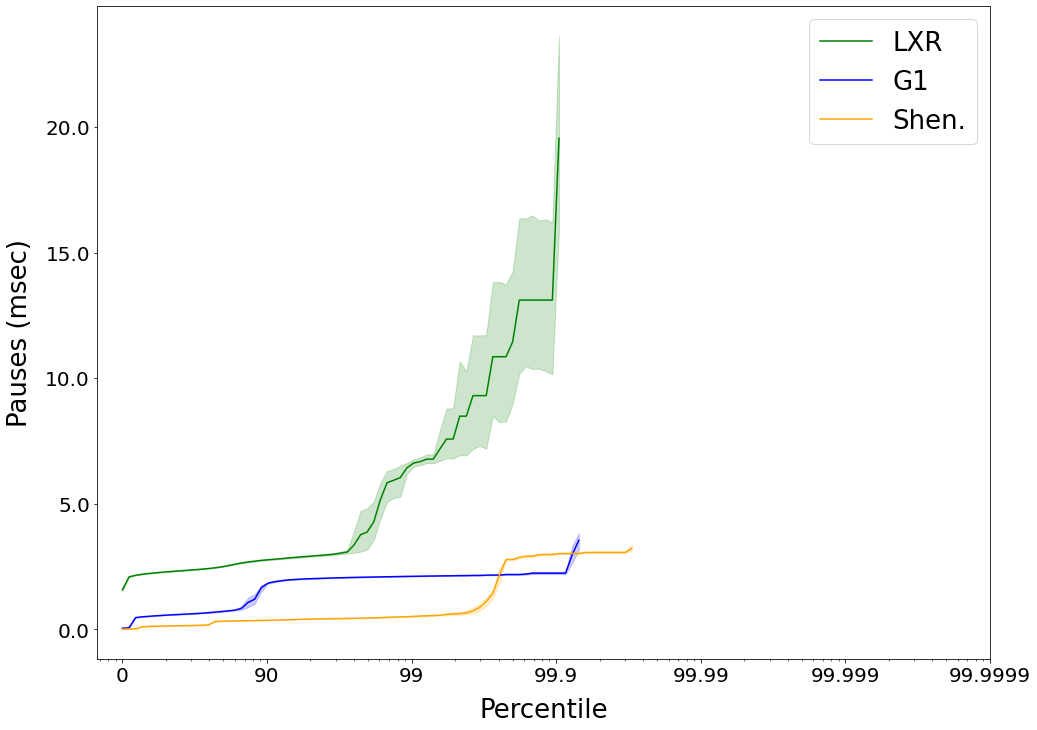

In [3]:
runid1 = 'elk-2021-12-05-Sun-154101'
plot_pause_data(
    bench = 'lusearch',
    data = {
        'LXR':   log(runid1, 'lusearch.3023.70.jdk.ix.common.tph.mmtk_perf.nr-1.dacapochopin-29a657f'),
        'G1':    log(runid1, 'lusearch.3023.70.jdk.g1.common.hs_perf.dacapochopin-29a657f'),
        'Shen.': log(runid1, 'lusearch.3023.70.jdk.shenandoah.common.hs_perf.dacapochopin-29a657f'),
    },
    invocations = 20,
)

## Pauses: cassandra

Loading...
Processing...
Plotting...
['LXR', 'G1', 'Shen.', 'ZGC'] ['green', 'blue', 'orange', 'red']


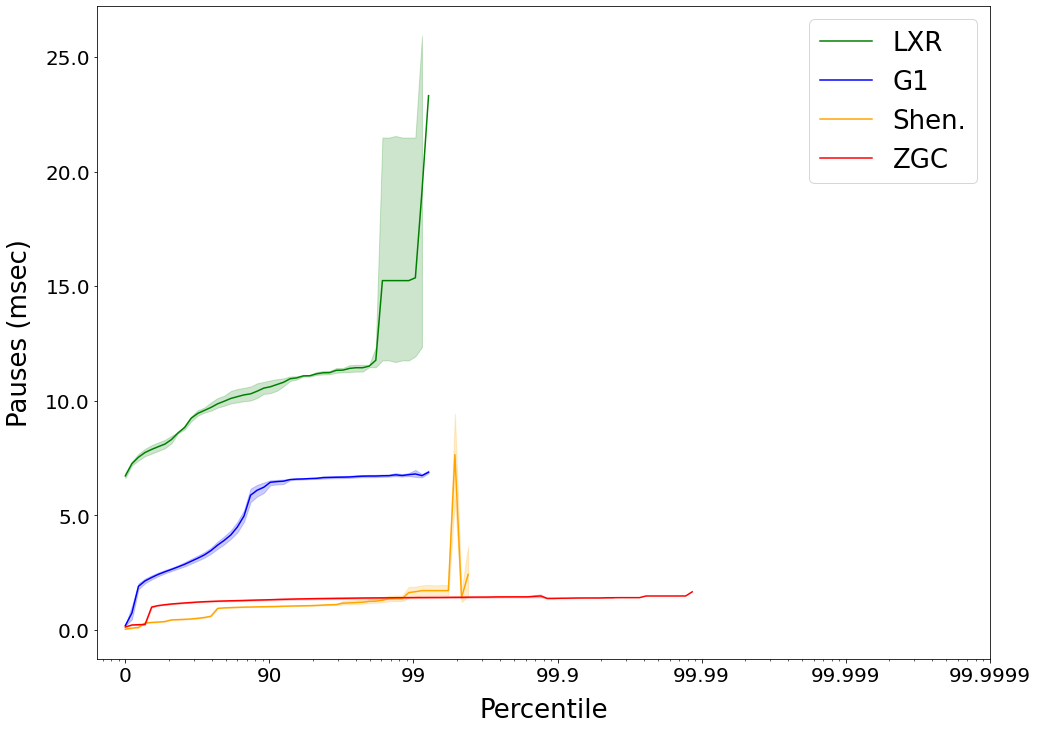

In [4]:
runid1 = 'elk-2021-12-05-Sun-154101'
plot_pause_data(
    bench = 'cassandra',
    data = {
        'LXR':   log(runid1, 'cassandra.3023.269.jdk.ix.common.tph.mmtk_perf.nr-1.dacapochopin-29a657f'),
        'G1':    log(runid1, 'cassandra.3023.269.jdk.g1.common.hs_perf.dacapochopin-29a657f'),
        'Shen.': log(runid1, 'cassandra.3023.269.jdk.shenandoah.common.hs_perf.dacapochopin-29a657f'),
        'ZGC':   log(runid1, 'cassandra.3023.269.jdk.z.common.hs_perf.dacapochopin-29a657f'),
    },
    invocations = 20,
)

## Pauses: h2

Loading...
Processing...
Plotting...
['LXR', 'G1', 'Shen.', 'ZGC'] ['green', 'blue', 'orange', 'red']


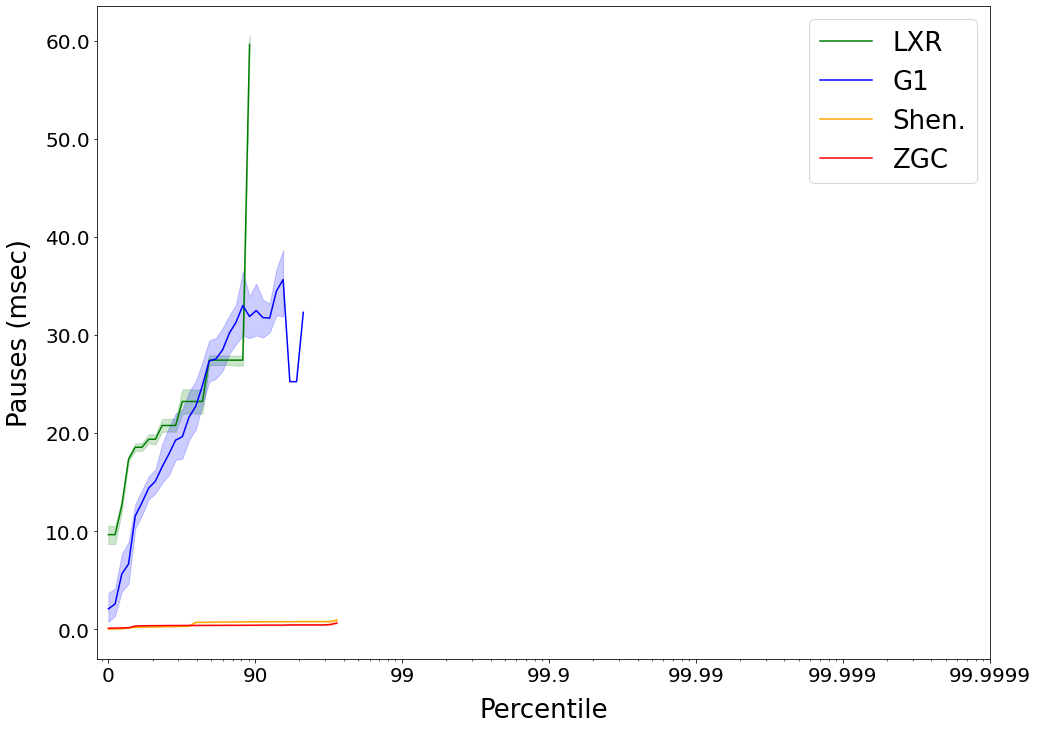

In [5]:
runid1 = 'elk-2021-12-05-Sun-154101'
plot_pause_data(
    bench = 'h2',
    data = {
        'LXR':   log(runid1, 'h2.3023.3489.jdk.ix.common.tph.mmtk_perf.nr-1.dacapochopin-29a657f'),
        'G1':    log(runid1, 'h2.3023.3489.jdk.g1.common.hs_perf.dacapochopin-29a657f'),
        'Shen.': log(runid1, 'h2.3023.3489.jdk.shenandoah.common.hs_perf.dacapochopin-29a657f'),
        'ZGC':   log(runid1, 'h2.3023.3489.jdk.z.common.hs_perf.dacapochopin-29a657f'),
    },
    invocations = 20,
)

## Pauses: tomcat

Loading...
Processing...
Plotting...
['LXR', 'G1', 'Shen.'] ['green', 'blue', 'orange']


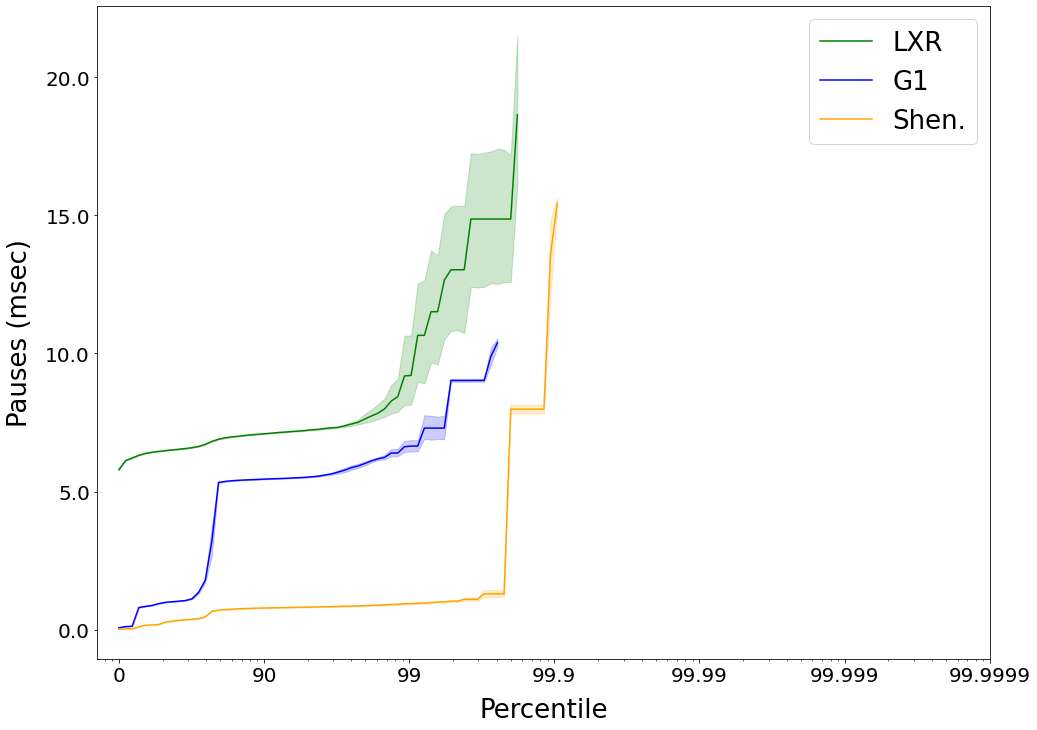

In [6]:
runid1 = 'elk-2021-12-05-Sun-154101'
plot_pause_data(
    bench = 'tomcat',
    data = {
        'LXR':   log(runid1, 'tomcat.3023.76.jdk.ix.common.tph.mmtk_perf.nr-1.dacapochopin-29a657f'),
        'G1':    log(runid1, 'tomcat.3023.76.jdk.g1.common.hs_perf.dacapochopin-29a657f'),
        'Shen.': log(runid1, 'tomcat.3023.76.jdk.shenandoah.common.hs_perf.dacapochopin-29a657f'),
    },
    invocations = 20,
)